# Matplotlib自定义：配置文件与样式表

`Matplotlib` 的默认图形设置经常被用户诟病。虽然 `Matplotlib 2.0` 版本已经有大幅改善，但是掌握自定义配置的方法可以让我们打造自己的艺术风格。  
首先简单浏览一下 `Matplotlib` 的运行时配置（`runtime configuration`，`rc`）功能的介绍，然后再看看新式的样式表（`stylesheets`）特性，里面包含了许多漂亮的默认配置功能。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

## 1. 手动配置图形

(array([  9.,  31.,  85., 189., 232., 210., 154.,  61.,  23.,   6.]),
 array([-2.76448225, -2.19309026, -1.62169827, -1.05030627, -0.47891428,
         0.09247771,  0.6638697 ,  1.23526169,  1.80665368,  2.37804567,
         2.94943767]),
 <BarContainer object of 10 artists>)

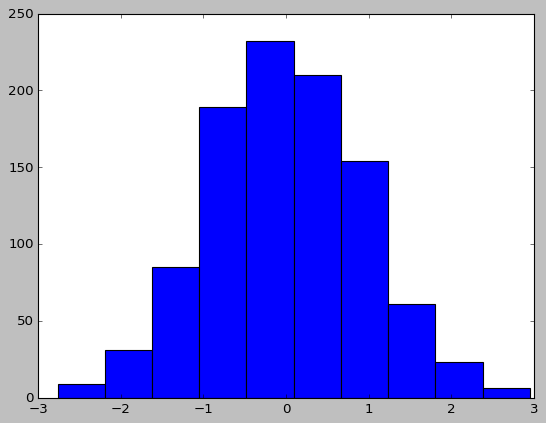

In [2]:
x = np.random.randn(1000)
plt.hist(x)

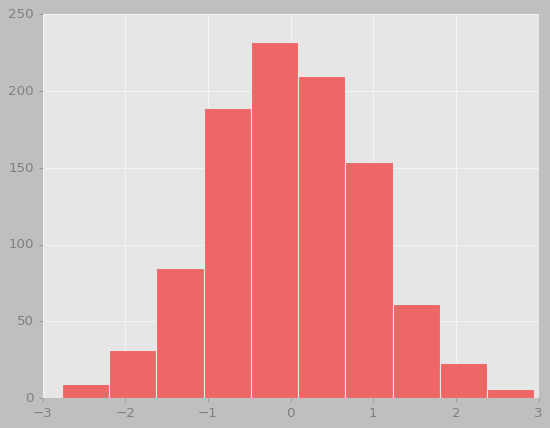

In [3]:
# 通过手动调整，可以让它成为美图
# 用灰色背景
# ax = plt.axes(axisbg='#E6E6E6')  # AttributeError: 'AxesSubplot' object has no property 'axisbg'
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# 画上白色的网格线
plt.grid(color='w', linestyle='solid')

# 隐藏坐标轴的线条
for spine in ax.spines.values():
    spine.set_visible(False)
    
# 隐藏上边与右边的刻度
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# 弱化刻度与标签
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# 设置频次直方图轮廓色与填充色
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

## 2. 修改默认配置：rcParams

上面调整后的图标看起来就漂亮多了。你可能会觉得它的风格与 `R` 语言的 `ggplot` 可视化程序包有点儿像。但这样设置可太费劲儿了！我们肯定不希望每做一个图都需要这样手动配置一番。  
好在已经有一种方法，可以让我们只配置一次默认图形，就能将其应用到所有图形上。  

`Matplotlib` 每次加载时，都会定义一个运行时配置（`rc`），其中包含了所有你创建的图形元素的默认风格。你可以用 `plt.rc` 简便方法随时修改这个配置。  
这些设置会保存在 `.matplotlibrc` 文件中，你可以在 `Matplotlib` 文档<http://matplotlib.org/users/customizing.html>中找到更多信息。  
来看看如何调整 `rc` 参数，用默认图形实现之前手动调整的效果。

In [4]:
# 先复制一下目前的 rcParams 字典，这样可以在修改之后再还原回来
IPython_default = plt.rcParams.copy()

In [5]:
# 现在就可以用 plt.rc 函数来修改配置参数了
from matplotlib import cycler

colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

(array([  9.,  31.,  85., 189., 232., 210., 154.,  61.,  23.,   6.]),
 array([-2.76448225, -2.19309026, -1.62169827, -1.05030627, -0.47891428,
         0.09247771,  0.6638697 ,  1.23526169,  1.80665368,  2.37804567,
         2.94943767]),
 <BarContainer object of 10 artists>)

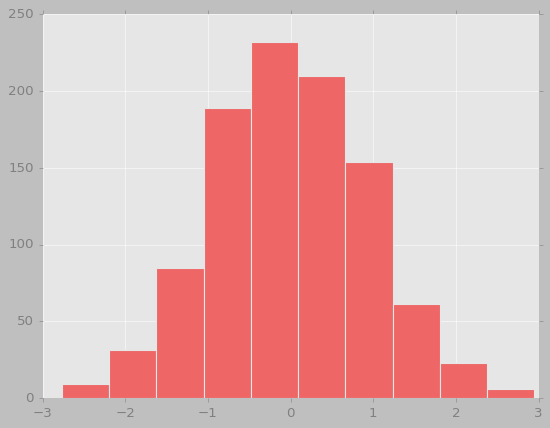

In [6]:
plt.hist(x)  # 创建一个图形看看效果

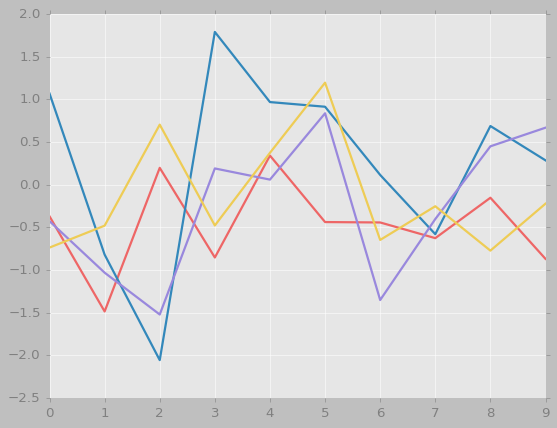

In [7]:
for i in range(4):
    plt.plot(np.random.randn(10))  # 再画一些线图看看 rc 参数的效果

## 3. 样式表

2014 年 8 月发布的 `Matplotlib 1.4` 版本中增加了一个非常好用的 `style` 模块，里面包含了大量的新式默认样式表，还支持创建和打包你自己的风格。  
虽然这些样式表实现的格式功能与前面介绍的 `.matplotlibrc` 文件类似，但是它的文件扩展名是 `.mplstyle`。  
即使你不打算创建自己的绘图风格，样式表包含的默认内容也非常有用。通过 `plt.style.available` 命令可以看到所有可用的风格。  
使用某种样式表的基本方法如下所示：
```python
plt.style.use('stylename')
```
但需要注意的是，这样会改变后面所有的风格！如果需要，你可以使用风格上下文管理器（`context manager`）临时更换至另一种风格：
```python
with plt.style.context('stylename'):
    make_a_plot()
```

In [8]:
plt.style.available  # 查看内置的样式表

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [9]:
# 创建一个可以画两种基本图形的函数
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

### 3.1. 默认风格

In [10]:
# 将之前设置的运行时配置还原为默认配置，重置rcParams
plt.rcParams.update(IPython_default)

/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be rem

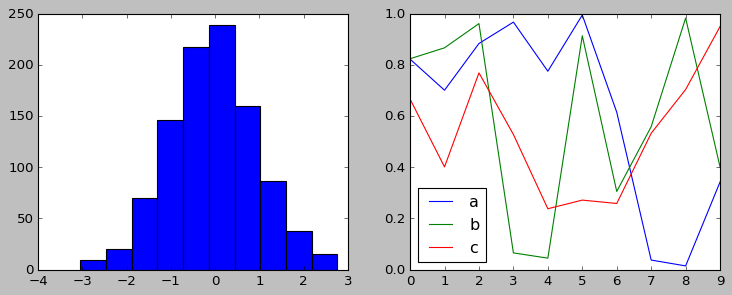

In [11]:
hist_and_lines()

### 3.2. FiveThirtyEight风格

`FiveThirtyEight` 风格模仿的是著名网站 `FiveThirtyEight`<http://fivethirtyeight.com>的绘图风格。这种风格使用深色的粗线条和透明的坐标轴：

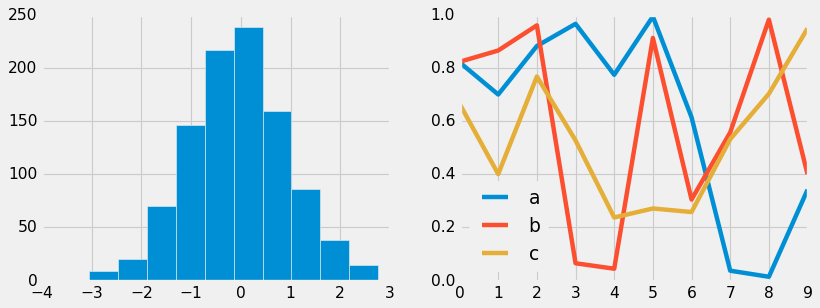

In [12]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### 3.3. ggplot风格

`R` 语言的 `ggplot` 是非常流行的可视化工具，`Matplotlib` 的 `ggplot` 风格就是模仿这个程序包的默认风格。

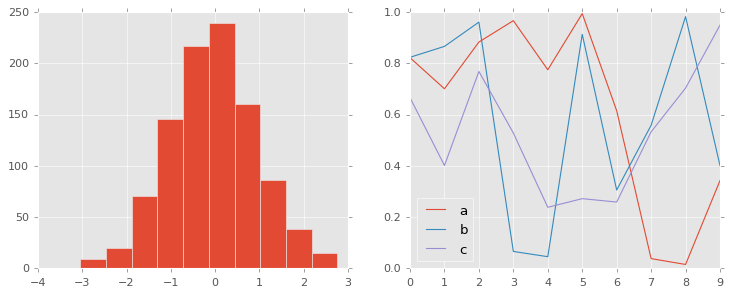

In [13]:
with plt.style.context('ggplot'):
    hist_and_lines()

### 3.4. bmh风格

有一本短小精悍的在线图书叫 `Probabilistic Programming and Bayesian Methods for Hackers`<http://bit.ly/2fDJsKC>。  
整本书的图形都是用 `Matplotlib` 创建的，通过一组 `rc` 参数创建了一种引人注目的绘图风格。这个风格被 `bmh` 样式表继承了：

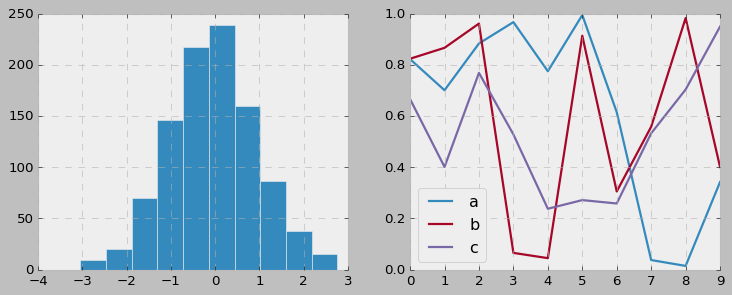

In [14]:
with plt.style.context('bmh'):
    hist_and_lines()

### 3.5. 黑色背景风格

在演示文档中展示图形时，用黑色背景而非白色背景往往会取得更好的效果。`dark_background` 风格就是为此设计的：

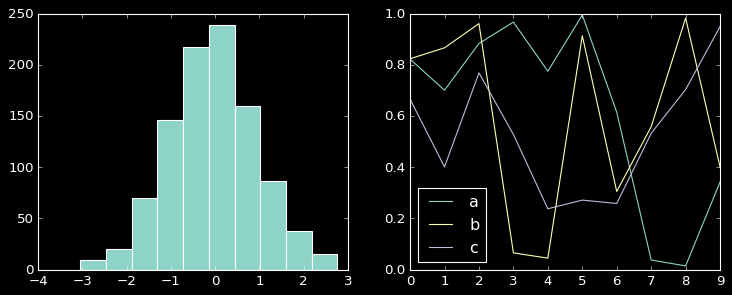

In [15]:
with plt.style.context('dark_background'):
    hist_and_lines()

### 3.6. 灰度风格

有时你可能会做一些需要打印的图形，不能使用彩色。这时使用 `grayscale` 风格的效果最好：

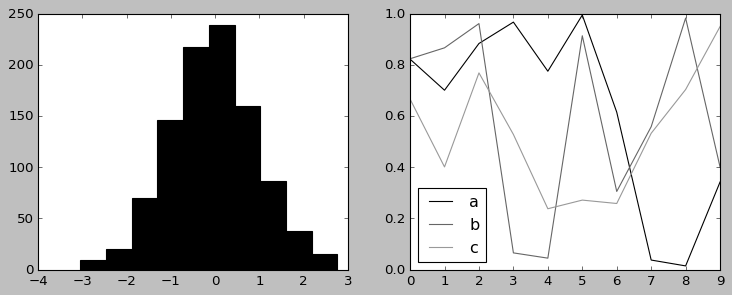

In [16]:
with plt.style.context('grayscale'):
    hist_and_lines()

### 3.7. Seaborn风格

`Matplotlib` 还有一些灵感来自 `Seaborn` 程序库的风格，这些风格在 `Notebook` 导入 `Seaborn` 程序库后会自动加载。  
我觉得这些风格非常漂亮，也是我自己在探索数据时一直使用的默认风格：

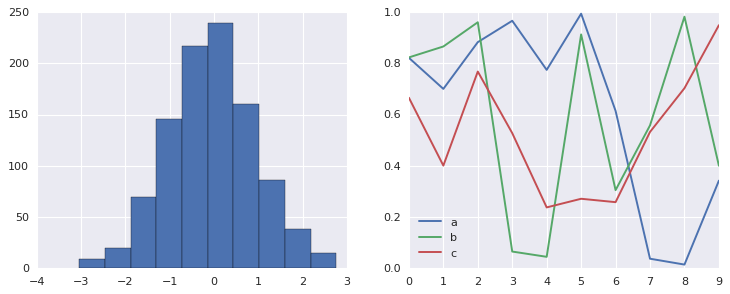

In [17]:
import seaborn

with plt.style.context('seaborn'):  # 应该的版本的问题，实操过程中，导入Seaborn程序库后并不能自动加载，仍然需要这样应用
    hist_and_lines()